In [16]:
import numpy as np
from numpy.linalg import inv

# Ex 1

In [17]:
stdPos = 2.
stdVel = 1.2
pMatrix = np.matrix([[stdPos**2, 0 ],[0 ,stdVel**2]])

deltaT = 1.
fMatrix = np.matrix([[1, deltaT ],[ 0 ,1]])

initialPos_guess = 8
initialVelocity_guess = 5
x = np.matrix([[initialPos_guess],[initialVelocity_guess]])

print("F matrix is:\n", fMatrix)
print("\nP matrix is:\n", pMatrix)
print("\nState Vector is:\n", x)

F matrix is:
 [[1. 1.]
 [0. 1.]]

P matrix is:
 [[4.   0.  ]
 [0.   1.44]]

State Vector is:
 [[8]
 [5]]


# Prediction Phase

In [18]:
Q_matrix = 0
I = np.matrix([[1, 0], [0, 1]])
x = fMatrix*x
pMatrix = fMatrix*pMatrix*fMatrix.T + Q_matrix

print("After Prediction")

print("\nP matrix is:\n", pMatrix)
print("\nState Vector is:\n", x)

After Prediction

P matrix is:
 [[5.44 1.44]
 [1.44 1.44]]

State Vector is:
 [[13.]
 [ 5.]]


# Update Phase

In [19]:
factor = 1./0.3048
std_sensor = 0.5
R_matrix = np.matrix([std_sensor**2])
H_matrix = np.matrix([factor, 0])
z = np.matrix([43])
print("R matrix is:\n", R_matrix)
print("H matrix is:\n", H_matrix)
print("meassurment (z) is:\n", z)



R matrix is:
 [[0.25]]
H matrix is:
 [[3.2808399 0.       ]]
meassurment (z) is:
 [[43]]


In [20]:
S = H_matrix*pMatrix*H_matrix.T +R_matrix
S = inv(S)
K = pMatrix*H_matrix.T*S

x = x + K*(z-H_matrix*x)
pMatrix = (I - K*H_matrix)*pMatrix

print("After Update:")

print("\nP matrix is:\n", pMatrix)
print("\nState Vector is:\n", x)
print("\nNew Kalman Gain (K):\n",K)

After Update:

P matrix is:
 [[0.02312702 0.00612186]
 [0.00612186 1.06044402]]

State Vector is:
 [[13.10594766]
 [ 5.02804497]]

New Kalman Gain (K):
 [[0.30350421]
 [0.08033935]]


In [21]:
print(43/factor)

13.1064


# Ex 2 - Prediction




In [6]:
stdPos = 2.
stdVel = 1.2
pMatrix = np.matrix([[stdPos**2,0 ],[ 0 ,stdVel**2]])

deltaT = 1.
fMatrix = np.matrix([[1, deltaT ],[ 0 ,1]])

initialPos_guess = 8
initialVelocity_guess = 5
x = np.matrix([[initialPos_guess],[initialVelocity_guess]])

print("F matrix is:\n", fMatrix)
print("\nP matrix is:\n", pMatrix)
print("\nState Vector is:\n", x)

Q_matrix = 0
I = np.matrix([[1, 0], [0, 1]])
x = fMatrix*x
pMatrix = fMatrix*pMatrix*fMatrix.T + Q_matrix

print("After Prediction")

print("\nP matrix is:\n", pMatrix)
print("\nState Vector is:\n", x)

F matrix is:
 [[1. 1.]
 [0. 1.]]

P matrix is:
 [[4.   0.  ]
 [0.   1.44]]

State Vector is:
 [[8]
 [5]]
After Prediction

P matrix is:
 [[5.44 1.44]
 [1.44 1.44]]

State Vector is:
 [[13.]
 [ 5.]]


# Ex2 - Update

In [7]:
factor = 1./0.3048
std_pos_sensor = 0.5
std_velocity_sensor = 4
R_matrix = np.matrix([[std_pos_sensor**2, 0],
                      [0, std_velocity_sensor**2]])
H_matrix = np.matrix([[factor, 0],[0, 1]])
z = np.matrix([[43],[4]])

S = H_matrix*pMatrix*H_matrix.T +R_matrix
S = inv(S)
K = pMatrix*H_matrix.T*S

x = x + K*(z-H_matrix*x)
pMatrix = (I - K*H_matrix)*pMatrix

print("After Update:")

print("\nP matrix is:\n", pMatrix)
print("\nState Vector is:\n", x)

After Update:

P matrix is:
 [[0.02312482 0.00574134]
 [0.00574134 0.99452888]]

State Vector is:
 [[13.10557877]
 [ 4.96414369]]


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

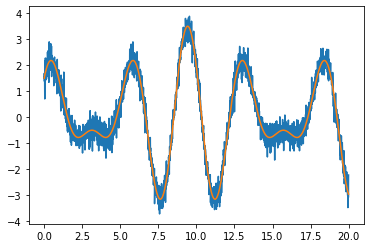

In [30]:
x = np.arange(0,20,0.01)
y = 2*np.sin(1.5*x)+ 1.5*np.cos(2*x)  +np.random.normal(0,0.3,len(x))
z = 2*np.sin(1.5*x)+ 1.5*np.cos(2*x)
plt.plot(x,y,x,z)

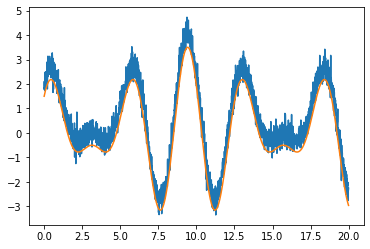

In [34]:
x = np.arange(0,20,0.01)
y = 2*np.sin(1.5*x)+ 1.5*np.cos(2*x)  +np.random.normal(0.5, 0.3,len(x))
z = 2*np.sin(1.5*x)+ 1.5*np.cos(2*x)
plt.plot(x,y,x,z)